## Linear Regression is a statistical model used in Machine Learning that falls in the “Supervised Learning” class of algorithms. We use it for predicting continuous-valued outputs.
Regression refers to an ensemble of statistical techniques and algorithms for describing the relationship between two or more variables

#### Dataset Description
Let’s start with our example: we have a dataset of patients checked for Systolic Blood Pressure (SBP) and monitored for age and weight, and we want to predict the SBP for a new patient. Implicitly we hypothesize that factors such as weight and age influence the SBP.

The Variable to be explained (SBP) is called the Dependent Variable, or Response Variable, and it matches with our output variable or target vector. Instead, the variables that explain the input (age and weight) are called Independent Variables or Predictor Variables, or Features. If the dependent and independent variables are continuous, as is the case for SBP, age, and weight, then a Correlation coefficient can be calculated as a measure of the strength of the relationship between them.

#### Step 1: Loading the dataset

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from __future__ import division

In [5]:
# Read data from file 'SBP.csv' 
# Make a pandas DataFrame "df" 
# containing the SBP data.
import pandas as pd
#df = pd.read_csv("SBP.csv")
df = pd.read_csv("I:\Whatsapp_download\house.txt.txt")

## Linear Regression with One Variable


The SBP dataset is formed by 3 columns (Age, Weight, and SBP), but we will use the first and the last columns (Age and SBP); our model will determine the strength of the relationship between Age and SBP. Pandas makes easy accessing to DataFrame variables, that will be copied in an X vector, containing the input, and a y vector, for the output.

In [ ]:
 #Make the X numpy arrays, containing the values of Age.
# and the output vector y, containing the SBP values.

X = np.asarray(df['Age'].values) #input
y = np.asarray(df['SBP'].values) #target

In [12]:
X=df[['area','rooms']].values.astype(float)
y=df['price'].values.astype(float)

## Step 2: Feature Scaling and Normalization

In [7]:
def FeatureScalingNormalization(X):
    # Initialize the following variables:
    # Make a copy of the X vector and call it X_norm
    X_norm = X 

    # mu: It will contain the average 
    # value of X in training set.
    mu = np.zeros(X.shape[0]) 

    # sigma: It will contain the Range(max-min)
    # of X or Standard Deviation
    sigma = np.zeros(X.shape[0]) 

    mu = X.mean()
    # The Standard Deviation calculation with NumPy,
    # requires the argument "degrees of freedom" = 1
    sigma = X.std(ddof=1)

    # number of training examples
    m = X.shape[0] 
    
    # Make a vector of size m with the mu values
    mu_matrix = np.multiply(np.ones(m), mu).T 
    
    # Make a vector of size m with the sigma values    
    sigma_matrix = np.multiply(np.ones(m), sigma).T
    
    # Apply the Feature Scaling Normalization formula
    X_norm = np.subtract(X, mu).T
    X_norm = X_norm /sigma.T
    
    return [X_norm, mu, sigma]

The code below implements a Python function called FeatureScalingNormalization(). This function takes X that is the features vector as an argument, and return 3 arguments: 1) the same X vector but scaled and normalized (X_norm), 2) mu, that is the average values of X in training set) and 3) sigma that is the Standard Deviation.

In [13]:
# Normalize X using the FeatureScalingNormalization() function, and 
# copy the results in the "featuresNormalizeresults" list
featuresNormalizeresults = FeatureScalingNormalization(X)

# get the normalized X matrix
X = np.asarray(featuresNormalizeresults[0]).T

# get the mean
mu = featuresNormalizeresults[1]

# get the sigma
sigma = featuresNormalizeresults[2]

#### The X vector containing the Age values is now normalized.

In [14]:
X

array([[ 9.59007910e-01, -8.69249324e-01],
       [ 5.20435018e-01, -8.69249324e-01],
       [ 1.21658247e+00, -8.69249324e-01],
       [ 3.60321105e-01, -8.70119508e-01],
       [ 1.73869305e+00, -8.68379140e-01],
       [ 8.55455977e-01, -8.68379140e-01],
       [ 4.63002853e-01, -8.69249324e-01],
       [ 3.69893132e-01, -8.69249324e-01],
       [ 3.28994470e-01, -8.69249324e-01],
       [ 4.28195481e-01, -8.69249324e-01],
       [ 8.16297683e-01, -8.68379140e-01],
       [ 8.68508741e-01, -8.69249324e-01],
       [ 7.72788467e-01, -8.69249324e-01],
       [ 3.02482546e+00, -8.67508955e-01],
       [ 2.31533827e-01, -8.69249324e-01],
       [ 1.12956403e+00, -8.68379140e-01],
       [ 2.76783411e-01, -8.70119508e-01],
       [ 2.03687929e-01, -8.69249324e-01],
       [ 1.39845099e+00, -8.68379140e-01],
       [ 1.76566876e+00, -8.68379140e-01],
       [ 6.65755797e-01, -8.69249324e-01],
       [ 7.71048099e-01, -8.70119508e-01],
       [ 5.23915755e-01, -8.69249324e-01],
       [ 8.

## Step 3: Add a column of ones to the X vector
Now we will add a column of ones to the X vector.

In [15]:
# Add a column of ones to the matrix X

m = len(y) # number of training examples
X = np.vstack((np.ones(m), X.T)).T

In [16]:
#The new structure of X is:
X

array([[ 1.00000000e+00,  9.59007910e-01, -8.69249324e-01],
       [ 1.00000000e+00,  5.20435018e-01, -8.69249324e-01],
       [ 1.00000000e+00,  1.21658247e+00, -8.69249324e-01],
       [ 1.00000000e+00,  3.60321105e-01, -8.70119508e-01],
       [ 1.00000000e+00,  1.73869305e+00, -8.68379140e-01],
       [ 1.00000000e+00,  8.55455977e-01, -8.68379140e-01],
       [ 1.00000000e+00,  4.63002853e-01, -8.69249324e-01],
       [ 1.00000000e+00,  3.69893132e-01, -8.69249324e-01],
       [ 1.00000000e+00,  3.28994470e-01, -8.69249324e-01],
       [ 1.00000000e+00,  4.28195481e-01, -8.69249324e-01],
       [ 1.00000000e+00,  8.16297683e-01, -8.68379140e-01],
       [ 1.00000000e+00,  8.68508741e-01, -8.69249324e-01],
       [ 1.00000000e+00,  7.72788467e-01, -8.69249324e-01],
       [ 1.00000000e+00,  3.02482546e+00, -8.67508955e-01],
       [ 1.00000000e+00,  2.31533827e-01, -8.69249324e-01],
       [ 1.00000000e+00,  1.12956403e+00, -8.68379140e-01],
       [ 1.00000000e+00,  2.76783411e-01

## Step 4: Plotting the dataset

Text(0, 0.5, 'SBP')

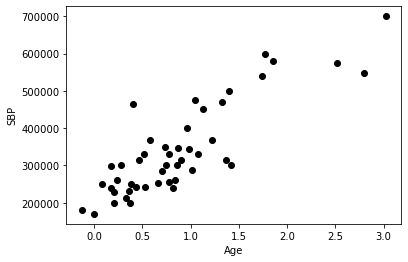

In [17]:
# Plot the data (plt is a matplotlib object)
plt.scatter(X[:,[1]], y,  color='black') 

# Put labels
plt.xlabel("Age")
plt.ylabel("SBP")

Visualizing the data at a glance, we can notice a pattern of increasing relationship, between Age and SBP. This is what we expect since systolic pressure is physiologically connected to age increasing.

## Step 5: The Hypothesis (Linear Regression Model)

The idea underlying the Linear Regression is represented by a function that predicts the output y based on the input feature X.

![alt text](HP.png)

The predicted output is the h = θ * X term that is equal to a constant called “bias term” or “intercept term” or θ_0 plus a weighted sum of the input features X, where θ_1 represents the weight for X. We will call this function “Hypothesis” , and we will use it to “map” from X (Age) to y (SBP).

The best performance in predicting y consists of finding θ values for which the distance between the predicted y value and the actual y value is closer to the minimum.
Let’s try two parameters randomly chosen, for the vector θ, for instance: θ = [120.0, 10.0], and see what happens:

ValueError: operands could not be broadcast together with shapes (47,) (2,) 

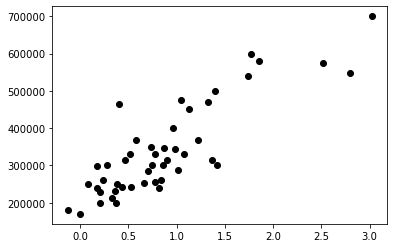

In [19]:
# Plot the Hypothesis: set theta manually
theta_0 = 120.0
theta_1 = 10.0

# the vector theta is initialized with theta_0 and theta_1
theta = np.asarray([theta_0,theta_1]).astype(float)

# Plot the data
plt.scatter(X[:,[1]], y,  color='black') 

# Plot a red line corrensponding to our Hypothesis model.
plt.plot(X[:,[1]], np.sum(np.multiply(X[:,theta), axis=1), color='red', linewidth=1)

# Put labels
plt.xlabel("Age")
plt.ylabel("SBP")

The Hypothesis model above, represented by the red line, should predict y (the SBP). It represents our h=θX vector in predicting y for the values of θ = [120.0, 10.0]. But this model, obviously, does not fit our data. The Hypothesis “touches” some of the y values, but the rest of the h vector is far from the minimum. So we are tempted to guess which θ could predict y when setting with different values. We could choose θ “by trial and error” to minimize all the distances between the Hypothesis and y. To accomplish this goal, we can calculate the Cost Function for our model.

## Step 6: Calculating the Cost Function
The Cost Function can register how much far we are from the minimum of the Hypothesis model and can help us in finding the best θ. The equation describing the Cost Function is the following:

![alt text](COST_Linear.png)

In order to simplify the explanation, let’s try to manually calculate the Cost Function for a smaller dataset composed only of the first 3 values of the SBP dataset, and with θ = [120.0, 10.0]. These parameters are chosen randomly, at the moment, because we don’t have to set the best θ for now. We will split the X and y, producing arrays X_1 and y_1:

In [ ]:
# Make a vector X_1 with the first 3 values of X
X_1 = X[0:3]

# Make a vector y_1 with the first 3 values of y
y_1 = y[0:3]

# Set m_1 = 3
# number of training examples
m_1 = 3

In [ ]:
X_1

In [ ]:
# Plot data and Hypothesis: set theta manually

theta_0 = 120.0
theta_1 = 10.0

# the vector theta is initialized with theta_0 and theta_1
theta = np.asarray([theta_0,theta_1]).astype(float)

# Plot the data
plt.scatter(X_1[:,[1]], y_1,  color='blue') 

# Plot a red line corresponding to our Hypothesis model.
plt.plot(X_1[:,[1]], np.sum(np.multiply(X_1,theta), axis=1), color='red', linewidth=1)
# Plot red points corresponding to the predicted values.
plt.scatter(X_1[:,[1]], np.sum(np.multiply(X_1,theta), axis=1),  color='red') 

# Put labels
plt.xlabel("Age")
plt.ylabel("SBP")

In [ ]:
#vectorized implementation
A = [[120 ,10]] ## THETA

B = [[1,1,1 ],
    [0.73189052 ,-0.59728997,1.15251726]] ##X INPUT

 
result =np.dot(A,B)
 
result

The vector y corresponding to the first three values (the blue dots) of the SBP is:
y = [117.0, 120.0, 145.0]
Since our θ is = [120, 10.0], the product of h = θ*X_1 will be represented by the following vector, (highlighted by the dots on the red line):
h = θ*X_1 = [127.7, 114.0, 131.5]

#### The following Code implements the cost function

In [228]:
# Calculate the Cost Function
def calcCostFunction(X, y, theta):
    
    # number of training examples
    m = len(y) 
    
    # initialize J (the cost)
    J = 0 

    # Calculate h = X * theta (we're using vectorized notation)
    h = np.sum(np.multiply(X, theta), axis=1)
    
    # Calculate the Squared Error = (h - y)^2 (vectorized)
    SquaredError = np.power(np.subtract(h,y), 2)
    
    # Calculate the Cost J
    J = 1/(2*m) * np.sum(SquaredError)
    
    return J

The code implements step by step the Cost Function (vectorized). Let’s repeat again:
* The Hypothesis (h=θX)
* The SquaredError that is = (h-y) ^2)
* The Cost Function J that is = 1/2m * Sum(SquaredError)
Now that we have understood the mechanism underlying the Cost Function calculation, let’s go back to the complete SBP dataset (16 patients). If we want to calculate the Cost Function for the whole SBP dataset, using θ = [120.0; 10.0], we will type :

In [229]:
calcCostFunction(X,y,theta)

95.30399770383346

#### Trying to compute j values manually

The following code generates randomly 10 θ vectors and passes them to the calcCostFunction, producing a table of the relative Cost Functions (J):


In [230]:
# Try some random theta, and produce a table with 
# random theta values and their relative J

import random # import the random library 

print("[Th0 Th1]", "\tJ") # write an header

for x in range(10):
    theta_0 = random.randint(1,101)
    theta_1 = random.randint(1,101)   
    theta = np.asarray([theta_0, theta_1]).astype(float)
    # Calculate J and print the table
    print(theta, calcCostFunction(X, y, theta))

[Th0 Th1] 	J
[13. 45.] 7298.446114667251
[12. 18.] 6868.9221958669
[32. 22.] 4777.856294948435
[45. 50.] 4292.457488519168
[20. 75.] 7922.514357778751
[53. 12.] 2907.0835472446
[74. 88.] 4396.893929793735
[30. 94.] 8216.045078416035
[10. 20.] 7120.764245407667
[12. 43.] 7350.541565126483


The “take-home message” is that trying to handly minimize J, is not the correct way to proceed. After 10 runs on randomly selected θ’s, the behavior of J is unpredictable. Moreover, there is no way to guess J basing on θ. So the question is: How we can choose θ, to find the minimum J? We need an algorithm that can minimize J for us, and this algorithm is the argument of the next Step.

## Step 7: Gradient Descent

We are interested in finding the minimum of the Cost Function using Gradient Descent, which is an algorithm that can automatize this search. The Gradient Descent calculates the derivative of the Cost Function, updating the vector θ by mean of the parameter α, that is the learning rate.
Gradient Descent will use the difference between the actual vector y of the dataset and the h vector prediction, to “learn” how to find the minimum J. The algorithm will repeat until it will converge. θ updating has to be simultaneous.

![alt text](GRADIENT.png)

#### Vectorized form
![alt text](vectorized.png)

#### Gradient Descent implementation.

In [231]:
def gradientDescent(X, y, theta, alpha, num_iters):
    
    # number of training examples
    m = len(y) 

    # Initialize J_history and Theta_history
    J_history = []
    Theta_history = []
    
    for i in range(num_iters):
        
        # Calculate h = X * theta (vectorized Eq. 5)
        h = np.sum(np.multiply(X,theta), axis=1)
    
        # Calculate the error = (h - y) (vectorized Eq. 5)
        error = np.subtract(h, y)
        
        # Calculate the new theta (vectorized Eq. 5)
        theta_new = alpha * 1/m * np.sum(np.multiply(X.T, error), axis=1)
        
        # Update theta
        theta = np.subtract(theta, theta_new)
        
        # Collect all the theta and J
        Theta_history.append(theta.tolist())        
        J_history.append(calcCostFunction(X,y,theta).tolist())

        
    return theta, Theta_history, J_history

To run the Gradient Descent, we have to initialize θ, iterations, and α, that together with X and y are the arguments of the gradientDescent function:

In [232]:
# Running the Gradient Descent

# Initialize theta
theta = np.asarray([0,0]).astype(float)

# Set the number of iterations for the Gradient Descent
iterations = 2000

# Set the Learning Rate
alpha = 0.01

# Run the gradientDescent() function, and collect the output in "results"
results = gradientDescent(X, y, theta, alpha, iterations)

# Get the theta from the results
theta = results[0] # new theta

# Get the theta history 
Theta_history = results[1] # Theta history

# Get the J history 
J_history = results[2] # Cost funtion history

In [233]:
#results[1] #THETA
results[2]
#results[0]

[8189.215427240348,
 8027.49459832014,
 7868.990961623042,
 7713.640514661439,
 7561.380528230737,
 7412.149521077872,
 7265.887235073793,
 7122.534610879869,
 6982.033764098433,
 6844.327961897793,
 6709.361600102299,
 6577.08018073819,
 6447.430290026179,
 6320.359576811855,
 6195.8167314252305,
 6073.751464960861,
 5954.114488970189,
 5836.857495557913,
 5721.933137874325,
 5609.295010995762,
 5498.8976331854265,
 5390.696427527038,
 5284.64770392386,
 5180.708641455867,
 5078.837271087914,
 4978.992458721911,
 4881.133888586187,
 4785.2220469553085,
 4691.218206193797,
 4599.084409117293,
 4508.78345366484,
 4420.278877876128,
 4333.534945167601,
 4248.5166299014945,
 4165.189603241976,
 4083.520219292669,
 4003.475501509979,
 3925.02312938671,
 3848.131425400616,
 3772.769342222604,
 3698.9064501794273,
 3626.5129249658066,
 3555.559535601014,
 3486.017632625054,
 3417.8591365296843,
 3351.056526419597,
 3285.5828288991743,
 3221.4116071803514,
 3158.5169504071637,
 3096.873463192

The results are collected in the “results” list. This list is composed of the found θ, plus two lists containing the θ and J histories. After 2000 iterations the Gradient Descent has found θ = [128.4, 9.9], and J = 59.7, which is the minimum J. We will use the two lists for plotting the Gradient Descent activity. The following code will plot the training set and h.

Text(0, 0.5, 'SBP')

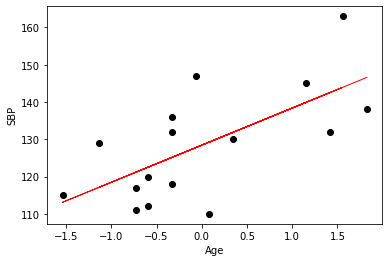

In [234]:
# Plot training set
plt.scatter(X[:,[1]], y,  color='black')

# Plot Hypothesis (theta were calculated with the Gradient Descent)
plt.plot(X[:,[1]], np.sum(np.multiply(X,theta), axis=1), color='red', linewidth=1)

# Put labels
plt.xlabel("Age")
plt.ylabel("SBP")

Plot of dataset and h; θ = [128.4; 9.9]; J = 59.7
the hypothesis now fits our data

Text(0, 0.5, 'theta')

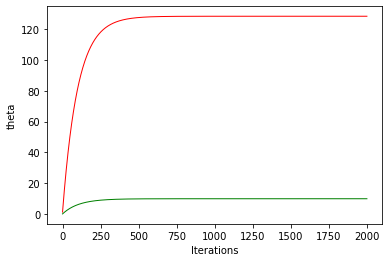

In [235]:
    # Plot the Theta history

theta_0 = np.asarray(Theta_history)[:,[0]]
theta_1 = np.asarray(Theta_history)[:,[1]]

plt.plot(theta_0[0:len(theta_0)], color='red', linewidth=1)
plt.plot(theta_1[0:len(theta_1)], color='green', linewidth=1)

# Put labels
plt.xlabel("Iterations")
plt.ylabel("theta")


A plot of the θ history is shown in Figure 6. The red curve represents θ_0, the green curve θ_1. After 2000 iterations, θ is = [128.4; 9.9]

Text(0, 0.5, 'J')

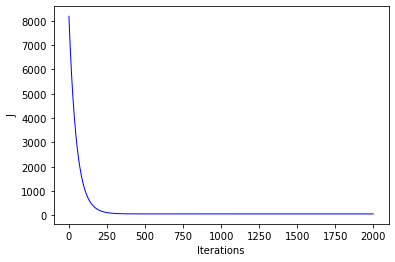

In [236]:
# Plot the J history
plt.plot(J_history[0:len(J_history)], color='blue', linewidth=1)

# Put labels
plt.xlabel("Iterations")
plt.ylabel("J")

After  2000 iterations the Cost Function falls down, stabilizing around 59.7 after 1500 iterations. The J curve depends on α, that we have set to 0.01.

## Step 8: Predictions

Now that we have found the best θ, we can predict the Systolic Blood Pressure for a 75 years-old person. The query is a vector, composed of two numbers [1, 75]. The first number corresponds to the feature x_0. To run the prediction, we have to scale and normalize the query vector, using the mu and sigma parameters that we have calculated in Step 5: Feature Scaling and Normalization. The query vector will be [1, 1.29]. Then, we have to multiply the query for the θ vector (θ = [128.4, 9.95]). The following code implements the prediction.

In [237]:
# Perform prediction basing on a query

# Predict the Systolic Blood Pressure (SBP) for a 75 yo human:
query = [1, 75]

# Scale and Normalize the query
query_Normalized = [1, ((query[1]-mu)/sigma)]

# Predict the SBP: (the prediction is the product of "75" and theta)
prediction = np.sum(np.multiply(query_Normalized, theta))

In [238]:
prediction
#The SBP for a 75 years-old man is: 141.2

141.24548922108335

## How to adapt the code for Multiple Variables

We have explained the statistical mechanisms underlying Linear Regression with one variable: the feature Age in the SBP dataset. The major part of the code here proposed works also with multiple variables. The SBP dataset is composed of 2 features (Age and Weight) and one output: SBP. In this step, we will update the code in a way that it can fit with multiple variables. The only adjustments required concern:
* The Dataset uploading
* The Feature Scaling and Normalization function
* The code for adding a column of “ones” to the vector X
* The Prediction Query.
* Dataset uploading
*The code for uploading the dataset has to be modified in order to produce a new X vector containing Age and Weight of each patient:


In [239]:
# Make the X numpy arrays,
# containing the values of
# Age and Weight
# and the output vector y, containing SBP values.
X = np.vstack((np.asarray(df.Age.values), \
               np.asarray(df.Weight.values)))
y = np.asarray(df.SBP.values)

## Feature Scaling and Normalization function
The code concerning Feature Scaling and Normalization is modified in vectors mu and sigma. Now the two vectors will accept two parameters each.

In [240]:
def FeatureScalingNormalization(X):
    # Initialize the following variables:
    # Make a copy of the X vector and call it X_norm
    X_norm = X
    
    # mu: It will contain the average 
    # value of X in training set.
    mu = np.zeros(X.shape[1])
    
    # sigma: It will contain the Range(max-min)
    # of X or Standard Deviation
    sigma = np.zeros(X.shape[1])
    mu = np.vstack((X[0].mean(), X[1].mean()))
    
    # The Standard Deviation calculation with NumPy,
    # requires the argument "degrees of freedom" = 1
    sigma = np.vstack((X[0].std(ddof=1), X[1].std(ddof=1)))
    
    # number of training examples
    m = X.shape[1] 
    
    # Make a vector of size m with the mu values
    mu_matrix = np.multiply(np.ones(m), mu).T 
    
    # Make a vector of size m with the sigma values    
    sigma_matrix = np.multiply(np.ones(m), sigma).T
    
    # Apply the Feature Scaling Normalization formula
    X_norm = np.subtract(X, mu).T
    X_norm = X_norm /sigma.T
    
    return [X_norm, mu, sigma]

In [241]:
# Normalize X using the FeatureScalingNormalization() function, and 
# copy the results in the "featuresNormalizeresults" list
featuresNormalizeresults = FeatureScalingNormalization(X)

# get the normalized X matrix
X = np.asarray(featuresNormalizeresults[0]).T

# get the mean
mu = featuresNormalizeresults[1]

# get the sigma
sigma = featuresNormalizeresults[2]

In [242]:
X

array([[-0.73189052, -0.59728997,  1.15251726, -1.13569219, -0.32808885,
         0.34491392,  0.07571281,  1.55631892, -0.32808885, -1.53949386,
        -0.32808885,  1.42171837, -0.73189052, -0.59728997, -0.05888774,
         1.82552004],
       [-1.3950265 ,  0.82315228,  1.23906081, -0.42457328, -1.11775415,
         0.06065333, -0.63252754,  1.23906081,  1.23906081, -1.67229885,
        -0.77116372,  1.44701507, -0.28593711, -0.3552552 ,  0.47656185,
         0.12997141]])

#### Adding a column of “ones” to the vector X

In [243]:
m = len(y) # number of training examples
X = np.vstack((np.ones(m), X)).T

In [244]:
X

array([[ 1.        , -0.73189052, -1.3950265 ],
       [ 1.        , -0.59728997,  0.82315228],
       [ 1.        ,  1.15251726,  1.23906081],
       [ 1.        , -1.13569219, -0.42457328],
       [ 1.        , -0.32808885, -1.11775415],
       [ 1.        ,  0.34491392,  0.06065333],
       [ 1.        ,  0.07571281, -0.63252754],
       [ 1.        ,  1.55631892,  1.23906081],
       [ 1.        , -0.32808885,  1.23906081],
       [ 1.        , -1.53949386, -1.67229885],
       [ 1.        , -0.32808885, -0.77116372],
       [ 1.        ,  1.42171837,  1.44701507],
       [ 1.        , -0.73189052, -0.28593711],
       [ 1.        , -0.59728997, -0.3552552 ],
       [ 1.        , -0.05888774,  0.47656185],
       [ 1.        ,  1.82552004,  0.12997141]])

#### The Prediction Query
The query for the predictions and the code for the normalization are modified as follows:

In [259]:
# Perform prediction basing on multiple Query
# Predict the Systolic Blood Pressure (SBP) for 
# a 75 years-old human with weight = 96 Kg:
query = [1 ,75, 96]

# Scale and Normalize the query
#query_Normalized = [1, ((query[0]-float(mu[0]))/float(sigma[0])), ((query[1]-float(mu[1]))/float(sigma[1]))]
tt=np.matrix(theta).transpose()
# Predict the SBP: (the prediction is the product of the vector [1, 75, 96] and theta)
prediction = np.sum(np.multiply(query,tt))

In [260]:
prediction

23802.805936350032

With these changes, the Python code is ready for Linear Regression with multiple variables. You have to update the code every time you will add new features from your training set!